In [37]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [38]:
oracleType, oracleValue = np.random.randint(2),np.random.randint(2)
n = 10 # number of qubits
if oracleType == 0: 
    print("The circuit returns a constant value")
else:
    print("The circuit returns a balanced function")
    a = np.random.randint(1, 2** n)


The circuit returns a constant value


In [39]:
qr = QuantumRegister(n + 1)
cr = ClassicalRegister(n)
circuitName = "Deutsch-Josza"

In [40]:
djCircuit = QuantumCircuit(qr,cr)
djCircuit.x(qr[n])
for i in range(n + 1):
    djCircuit.h(qr[i])
djCircuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=11, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(11, 'q5'), 0), Qubit(QuantumRegister(11, 'q5'), 1), Qubit(QuantumRegister(11, 'q5'), 2), Qubit(QuantumRegister(11, 'q5'), 3), Qubit(QuantumRegister(11, 'q5'), 4), Qubit(QuantumRegister(11, 'q5'), 5), Qubit(QuantumRegister(11, 'q5'), 6), Qubit(QuantumRegister(11, 'q5'), 7), Qubit(QuantumRegister(11, 'q5'), 8), Qubit(QuantumRegister(11, 'q5'), 9), Qubit(QuantumRegister(11, 'q5'), 10)), clbits=())

In [41]:
if oracleType == 0:
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.id(qr[n])
else:
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
djCircuit.barrier()



CircuitInstruction(operation=Instruction(name='barrier', num_qubits=11, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(11, 'q5'), 0), Qubit(QuantumRegister(11, 'q5'), 1), Qubit(QuantumRegister(11, 'q5'), 2), Qubit(QuantumRegister(11, 'q5'), 3), Qubit(QuantumRegister(11, 'q5'), 4), Qubit(QuantumRegister(11, 'q5'), 5), Qubit(QuantumRegister(11, 'q5'), 6), Qubit(QuantumRegister(11, 'q5'), 7), Qubit(QuantumRegister(11, 'q5'), 8), Qubit(QuantumRegister(11, 'q5'), 9), Qubit(QuantumRegister(11, 'q5'), 10)), clbits=())

In [42]:
for i in range(n):
    djCircuit.h(qr[i])
djCircuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=11, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(11, 'q5'), 0), Qubit(QuantumRegister(11, 'q5'), 1), Qubit(QuantumRegister(11, 'q5'), 2), Qubit(QuantumRegister(11, 'q5'), 3), Qubit(QuantumRegister(11, 'q5'), 4), Qubit(QuantumRegister(11, 'q5'), 5), Qubit(QuantumRegister(11, 'q5'), 6), Qubit(QuantumRegister(11, 'q5'), 7), Qubit(QuantumRegister(11, 'q5'), 8), Qubit(QuantumRegister(11, 'q5'), 9), Qubit(QuantumRegister(11, 'q5'), 10)), clbits=())

In [43]:
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

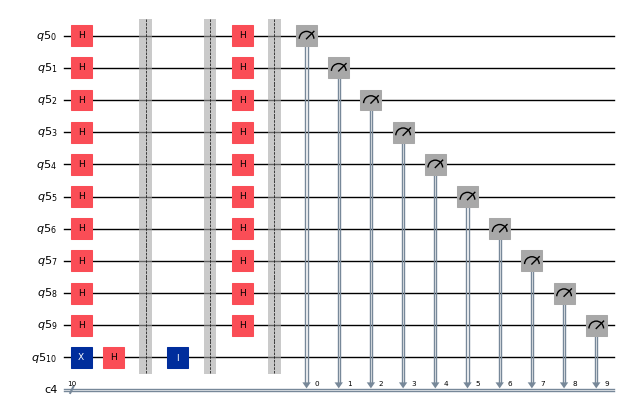

In [44]:
djCircuit.draw(output="mpl",scale=0.5)